# Dimensionality reduction

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.chdir('/Users/Vincent/Desktop/Python/DataCamp/Data')

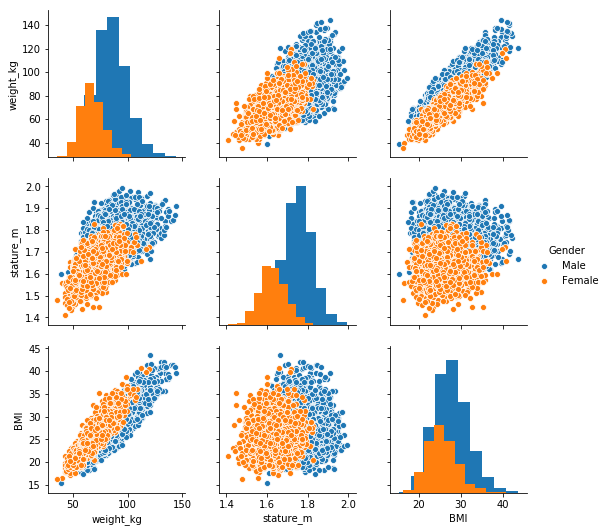

In [33]:
# Large dataset
ansur_male = pd.read_csv("ANSUR_II_MALE.csv")
ansur_female = pd.read_csv("ANSUR_II_FEMALE.csv")
ansur = pd.merge(ansur_male,ansur_female, how="outer")
ansur = ansur[ansur.notnull()]

# Select a few features to get general idea
ansur_sub = ansur.loc[:,['Gender','weight_kg','stature_m','BMI']]

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_sub, hue='Gender', diag_kind='hist')
plt.show()

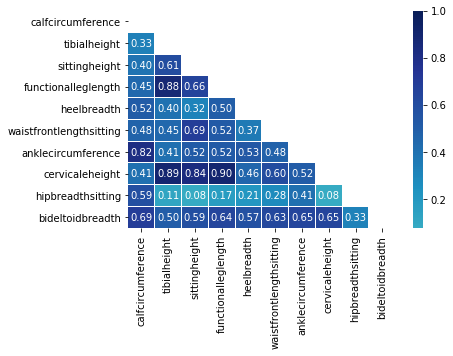

In [34]:
import random

# Select 10 random features from the numerical ones
ansur_sub = pd.DataFrame(ansur.iloc[:,random.sample(range(4, 97), 10)])
# Create the correlation matrix
corr = ansur_sub.corr()

# Heatmap without duplicates 
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="YlGnBu", center=0, linewidths=0.1, annot=True, fmt=".2f")
plt.show()

In [35]:
# remove highly correlated features
corr_matrix = ansur.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# drop highly correlated features (r > 0.9)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]
reduced_df = ansur.drop(to_drop, axis=1)

print("The original dataframe has {} columns.".format(ansur.shape[1]))
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 99 columns.
The reduced dataframe has 56 columns.


## t-SNE

In [19]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize

# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component','Height_class','BMI_class']

# Drop the non-numerical columns from df
ansur_numeric = ansur.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate=50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(ansur_numeric)
print(tsne_features.shape)

(6068, 2)


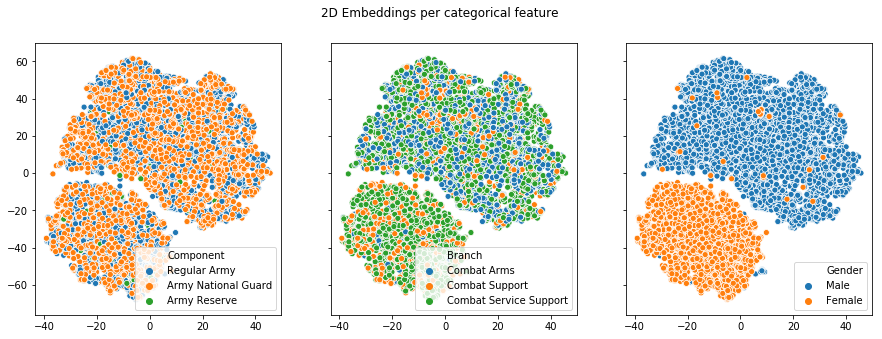

In [26]:
# plot points by categoricals
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue='Component', data=ansur,ax=axs[0])
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue='Branch', data=ansur,ax=axs[1])
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue='Gender', data=ansur,ax=axs[2])
fig.suptitle('2D Embeddings per categorical feature')
# Show the plot
plt.show()

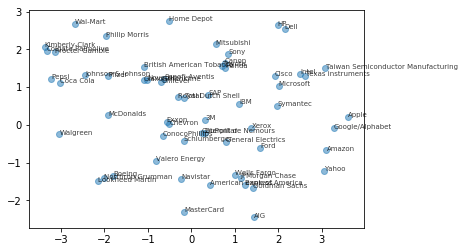

In [4]:
movements = pd.read_csv('stocks.csv')
companies = movements.iloc[:,0].values.tolist()
movements = np.array(movements.drop(movements.columns[[0]], axis=1))

# Normalize the movements
normalized_movements = normalize(movements)

model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(normalized_movements)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=7, alpha=0.75)
plt.show()

## PCA

In [36]:
from sklearn.decomposition import PCA

grains = pd.read_csv('seeds-width-vs-length.csv', header=None)
grains = np.array(grains)

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()
model.fit(grains)
mean = model.mean_

# Get the first principal component
first_pc = model.components_[0,:]

plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.axis('equal')
plt.show()

FileNotFoundError: File b'seeds-width-vs-length.csv' does not exist

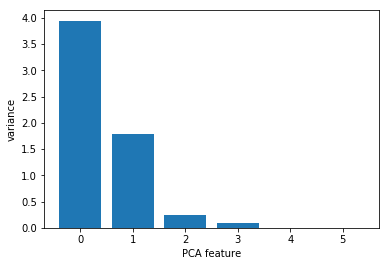

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

samples = pd.read_csv('fish.csv', header=None)
samples = np.array(samples.drop(samples.columns[[0]], axis=1))

scaler = StandardScaler()
pca = PCA()

# Create pipeline
pipeline = make_pipeline(scaler, pca)
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

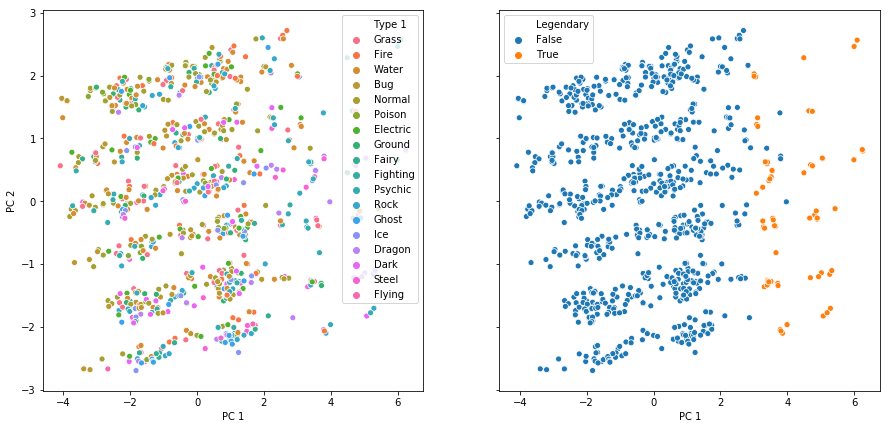

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

poke_df = pd.read_csv('pokemon.csv')
categorical_feature_mask = poke_df.dtypes == object
X = poke_df.drop(poke_df.columns[categorical_feature_mask],axis=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(X)

# Add the 2 components to poke_cat_df
poke_df['PC 1'] = pc[:, 0]
poke_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
sns.scatterplot(data=poke_df, x='PC 1', y='PC 2', hue='Type 1',ax=axs[0])
sns.scatterplot(data=poke_df, x='PC 1', y='PC 2', hue='Legendary',ax=axs[1])
plt.show()

## Image Compression

In [43]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.05, wspace=0.05))   
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28), 
        cmap='binary',
        clim=(0, 300))
    plt.show()

In [114]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

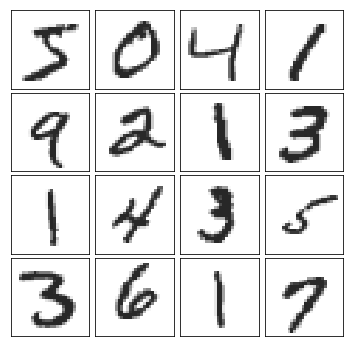

In [115]:
image_index = 333
plot_digits(x_train)

In [116]:
# Reshaping the array to 2-dims
# input_shape = (28, 28, 1) -> 28x28 = 784
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

pipe = Pipeline(memory=None,steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), 
                                   ('reducer', PCA(copy=True, iterated_power='auto', n_components=78,
                                                   random_state=None, svd_solver='auto', tol=0.0,
                                                   whiten=False))])
pipe.fit(x_train,y_train)
pc = pipe.transform(x_test)

# Prints the number of features per dataset
print("X_test has {} features".format(x_test.shape[1]))
print("pc has {} features".format(pc.shape[1]))

X_test has 784 features
pc has 78 features


x_rebuilt has 784 features


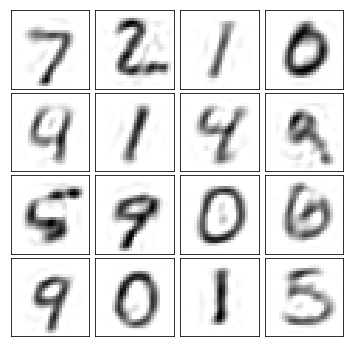

In [118]:
# Reconstruct image using principal components
x_rebuilt = pipe.inverse_transform(pc)

# Prints the number of features
print("x_rebuilt has {} features".format(x_rebuilt.shape[1]))
plot_digits(x_rebuilt)

# Recursive feature Elimination

In [30]:
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("diabetes.csv")
y = df.loc[:,'Outcome']
X = df.drop('Outcome', axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

lr = LogisticRegression()
lr.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)
y_pred = lr.predict(X_test_std)

# Prints accuracy metrics and feature coefficients
print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred))) 
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

81.0% accuracy on test set.
{'Pregnancies': 0.37, 'Glucose': 1.19, 'BloodPressure': 0.26, 'SkinThickness': 0.01, 'Insulin': 0.09, 'BMI': 0.68, 'DiabetesPedigreeFunction': 0.28, 'Age': 0.14}


In [45]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=3, verbose=1)
rfe.fit(X_train, y_train)

# Print the features and their ranking (high = dropped early on)
print("\n")
print(dict(zip(X.columns, rfe.ranking_)))
print("\n")

# Print the features that are not eliminated
print(X.columns[rfe.support_])

# Calculates the test set accuracy
acc = accuracy_score(y_test, rfe.predict(X_test))
print("{0:.1%} accuracy on test set.".format(acc)) 

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


{'Pregnancies': 1, 'Glucose': 2, 'BloodPressure': 3, 'SkinThickness': 5, 'Insulin': 6, 'BMI': 1, 'DiabetesPedigreeFunction': 1, 'Age': 4}


Index(['Pregnancies', 'BMI', 'DiabetesPedigreeFunction'], dtype='object')
72.3% accuracy on test set.


## Advanced feature selection

In [24]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

ansur_male = pd.read_csv("ANSUR_II_MALE.csv")
ansur_female = pd.read_csv("ANSUR_II_FEMALE.csv")
ansur = pd.merge(ansur_male,ansur_female, how="outer")
ansur = ansur[ansur.notnull()]

y = ansur.loc[:,"bicepscircumferenceflexed"]

X = ansur.drop("bicepscircumferenceflexed", axis=1)
categorical_feature_mask = X.dtypes == object
X = X.drop(X.columns[categorical_feature_mask],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

lcv = LassoCV()
lcv.fit(X_train,y_train)
print('Optimal alpha = {0:.3f}'.format(lcv.alpha_))

# Calculate R squared on the test set
r_squared = lcv.score(X_test,y_test)
print('The model explains {0:.1%} of the test set variance'.format(r_squared))

# Create a mask for coefficients not equal to zero
lcv_mask = lcv.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))

Optimal alpha = 3.571
The model explains 90.7% of the test set variance
39 features out of 93 selected


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Select 10 features with RFE on a GradientBoostingRegressor, drop 3 features on each step
rfe_gb = RFE(estimator=GradientBoostingRegressor(), 
             n_features_to_select=10, step=3, verbose=0)
rfe_gb.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_gb.score(X_test,y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
gb_mask = rfe_gb.support_
print('{} features out of {} selected'.format(sum(gb_mask), len(gb_mask)))

The model can explain 89.3% of the variance in the test set
10 features out of 93 selected


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Select 10 features with RFE on a RandomForestRegressor, drop 3 features on each step
rfe_rf = RFE(estimator=RandomForestRegressor(), 
             n_features_to_select=10, step=3, verbose=0)
rfe_rf.fit(X_train, y_train)

# Calculate the R squared on the test set
r_squared = rfe_rf.score(X_test, y_test)
print('The model can explain {0:.1%} of the variance in the test set'.format(r_squared))

# Assign the support array to gb_mask
rf_mask = rfe_rf.support_
print('{} features out of {} selected'.format(sum(rf_mask), len(rf_mask)))

The model can explain 87.9% of the variance in the test set
10 features out of 93 selected


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#Sum the votes of the three models
votes = np.sum([lcv_mask, rf_mask, gb_mask], axis=0)

# Create a mask for features selected by all 3 models
meta_mask = votes >= 3
X_reduced = X.loc[:, meta_mask]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
scaler = StandardScaler()
lm = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

lm.fit(scaler.fit_transform(X_train), y_train)
r_squared = lm.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance \
in the test set using {1:} features.'.format(r_squared, len(lm.coef_)))

The model can explain 89.0% of the variance in the test set using 8 features.


## NMF

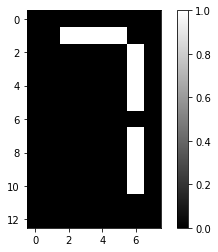

In [132]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.show()              
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()

samples = pd.read_csv('lcd-digits.csv', header=None)
samples = np.array(samples)

# Select the 0th row (first image)

digit = samples[0,:]
show_as_image(digit)

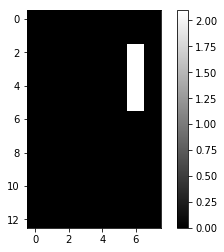

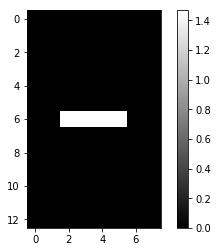

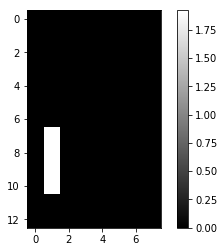

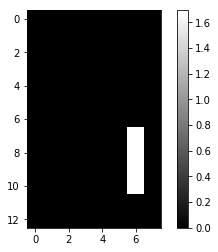

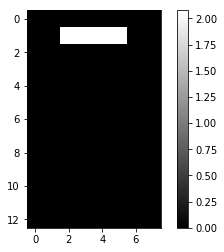

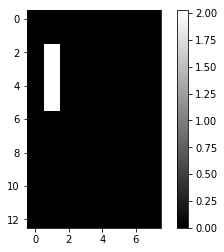

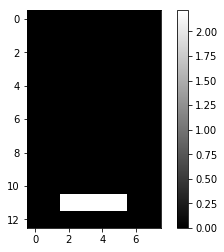

In [133]:
# Identify meaningful parts of image samples using NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(7)

# fit NMF to image data to identify important pixel groups
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

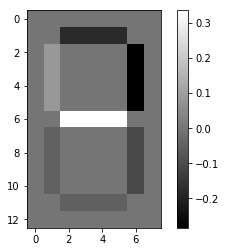

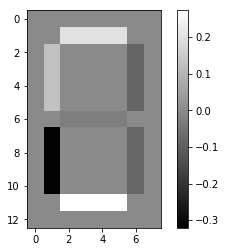

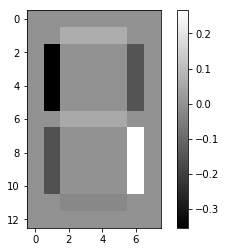

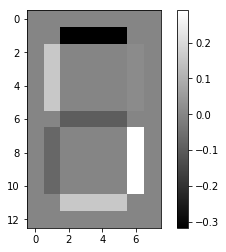

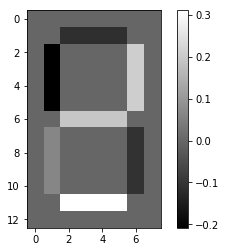

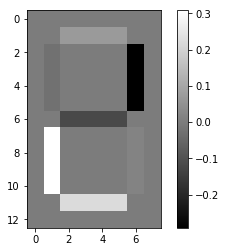

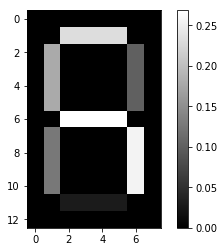

In [134]:
# In contrast, PCA doesn't learn seperate components but rather a good general representation
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)